### Import packages

In [1]:
import numpy as np
import sklearn
import pandas as pd
import prosail as prosaillib
from scipy import stats
from scipy.stats import truncnorm
import adanet
from sklearn.preprocessing import normalize
#import tensorflow as tf
import skopt

pd.set_option("display.max_rows", None)

### Load in the dataset

In [2]:
items = pd.read_csv('./data_with_angles.csv')
etm_rows = items[items['SensorType'] == 'ETM+']
etm_rows = etm_rows.dropna(subset=['h_grass', 'c_grass'])

bands = etm_rows.filter(regex='B\d$') / 10_000
grass_info = etm_rows.filter(regex='_grass$')
angles = etm_rows.filter(regex='B\d_.+$')

items = grass_info.join(bands).join(angles)
items

h_grass  c_grass      B1      B2      B3      B4      B5      B6  \
0         2.0     0.85  0.0621  0.0822  0.0915  0.2853  0.2891  0.2945   
1         1.0     0.80  0.0560  0.0800  0.0857  0.3059  0.2738  0.2950   
2         1.0     0.80  0.0580  0.0821  0.0915  0.3059  0.2815  0.2950   
3         1.0     0.85  0.0621  0.0863  0.0915  0.3059  0.2865  0.2955   
4         2.0     0.85  0.0600  0.0884  0.0934  0.3060  0.2866  0.2955   
5         2.0     0.85  0.0579  0.0862  0.0934  0.3183  0.2841  0.2950   
6         1.0     0.80  0.0519  0.0821  0.0857  0.3307  0.2815  0.2955   
7         2.0     0.85  0.0558  0.0841  0.0876  0.3225  0.2916  0.2955   
8         1.0     0.85  0.0558  0.0841  0.0914  0.3308  0.2967  0.2955   
9         2.0     0.90  0.0516  0.0819  0.0876  0.3389  0.3094  0.2960   
10        2.0     0.90  0.0557  0.0840  0.0952  0.3225  0.3094  0.2960   
11        1.0     0.65  0.0578  0.0840  0.0895  0.3061  0.2917  0.2960   
13        1.0     0.80  0.0536  0.0778  0.0817  0.2567  0.2361  0.2945   
14        2.0     0.85  0.0578  0.0840  0.0932  0.3225  0.3018  0.2955   
15        1.0     0.70  0.0537  0.0862  0.0914  0.3308  0.3094  0.2955   
16        1.0     0.90  0.0578  0.0840  0.0895  0.3267  0.3068  0.2960   
17        1.0     0.85  0.0598  0.0840  0.0914  0.3308  0.3068  0.2960   
18        2.0     0.90  0.0578  0.0820  0.0952  0.3308  0.3144  0.2955   
19        1.0     0.85  0.0578  0.0799  0.0914  0.3349  0.3120  0.2955   
20        2.0     0.80  0.0497  0.0820  0.0895  0.3266  0.3094  0.2955   
21        2.0     0.80  0.0578  0.0840  0.0895  0.3266  0.3094  0.2960   
22        1.0     0.80  0.0578  0.0820  0.0914  0.3226  0.3068  0.2960   
23        2.0     0.85  0.0599  0.0799  0.0876  0.3389  0.3094  0.2955   
24        2.0     0.80  0.0578  0.0820  0.0876  0.3308  0.2917  0.2955   
25        1.0     0.75  0.0578  0.0799  0.0819  0.3225  0.2967  0.2950   
26        2.0     0.65  0.0619  0.0820  0.0895  0.2319  0.2260  0.2934   
27        2.0     0.80  0.0537  0.0841  0.0915  0.3061  0.2917  0.2929   
28        1.0     0.90  0.0558  0.0841  0.0857  0.3183  0.2942  0.2939   
29        1.0     0.90  0.0558  0.0821  0.0876  0.3225  0.2967  0.2950   
30        2.0     0.85  0.0558  0.0800  0.0857  0.3225  0.2992  0.2945   
31        2.0     0.90  0.0559  0.0800  0.0915  0.3102  0.3017  0.2950   
32        2.0     0.90  0.0600  0.0841  0.0895  0.3102  0.2992  0.2950   
33        2.0     0.90  0.0539  0.0821  0.0876  0.3059  0.3042  0.2945   
34        1.0     0.95  0.0539  0.0800  0.0857  0.3101  0.2916  0.2945   
35        2.0     0.90  0.0520  0.0779  0.0896  0.3223  0.2991  0.2939   
36        2.0     0.80  0.0521  0.0758  0.0820  0.3140  0.2764  0.2934   
37        1.0     0.85  0.0521  0.0758  0.0801  0.3181  0.2764  0.2939   
38        2.0     0.80  0.0561  0.0842  0.0877  0.2852  0.2586  0.2934   
39        2.0     0.85  0.0523  0.0718  0.0839  0.2193  0.2132  0.2929   
40        2.0     0.85  0.0562  0.0823  0.0897  0.3139  0.2889  0.2950   
41        2.0     0.65  0.0603  0.0823  0.0820  0.3016  0.2839  0.2939   
42        2.0     0.90  0.0522  0.0801  0.0877  0.3099  0.2789  0.2945   
43        2.0     0.90  0.0561  0.0842  0.0877  0.3262  0.2990  0.2945   
44        2.0     0.70  0.0561  0.0822  0.0953  0.3304  0.3117  0.2939   
45        2.0     0.70  0.0561  0.0842  0.0916  0.3222  0.3015  0.2939   
46        2.0     0.70  0.0622  0.0863  0.0896  0.3180  0.2890  0.2934   
47        2.0     0.75  0.0602  0.0842  0.0896  0.3140  0.2814  0.2934   
48        2.0     0.70  0.0581  0.0884  0.0857  0.3181  0.2840  0.2934   
49        2.0     0.75  0.0622  0.0863  0.0877  0.3222  0.2814  0.2939   
50        2.0     0.80  0.0622  0.0863  0.0896  0.3058  0.2865  0.2929   
51        2.0     0.75  0.0581  0.0801  0.0935  0.2853  0.2613  0.2924   
52        1.0     0.85  0.0564  0.0803  0.0821  0.3137  0.2838  0.2929   
53        1.0     0.90  0.0564  0.0803  0.0821  0.3137  0.2838  0.2929   
54        

In [3]:
items.describe()

h_grass      c_grass           B1           B2           B3  \
count  1748.000000  1748.000000  1748.000000  1748.000000  1748.000000   
mean      5.559497    29.292620     0.044192     0.072019     0.057374   
std       5.688278    44.105461     0.014875     0.015846     0.020545   
min       0.000000     0.000000     0.022600     0.025800     0.009100   
25%       2.000000     0.850000     0.035175     0.061900     0.043200   
50%       4.000000     1.000000     0.041000     0.071500     0.050500   
75%       7.000000    97.000000     0.049600     0.079800     0.064100   
max      40.000000   100.000000     0.202800     0.245900     0.229000   

                B4           B5           B6           B7  B1_solar_azimuth  \
count  1748.000000  1748.000000  1748.000000  1748.000000       1748.000000   
mean      0.398755     0.222578     0.291492     0.108197        154.395704   
std       0.103450     0.040770     0.004949     0.033771          6.151731   
min       0.077000     0.035700     0.277200     0.012100        147.420000   
25%       0.331675     0.205175     0.289200     0.087400        150.230000   
50%       0.418300     0.228400     0.292400     0.101900        151.860000   
75%       0.464625     0.244000     0.294500     0.117900        156.390000   
max       0.619600     0.353900     0.299500     0.232300        168.200000   

       ...  B3_sensor_azimuth  B3_sensor_zenith  B4_sensor_azimuth  \
count  ...        1748.000000       1748.000000        1748.000000   
mean   ...         116.895795          0.403953         116.904153   
std    ...          82.519604          0.181874          82.519627   
min    ...        -178.760000          0.210000        -178.750000   
25%    ...         123.127500          0.270000         123.135000   
50%    ...         140.195000          0.330000         140.225000   
75%    ...         153.890000          0.480000         153.890000   
max    ...         179.930000          0.990000         179.940000   

       B4_sensor_zenith  B5_sensor_azimuth  B5_sensor_zenith  \
count       1748.000000        1748.000000       1748.000000   
mean           0.403947         116.800686          0.403301   
std            0.181890          82.444869          0.182141   
min            0.210000        -178.800000          0.210000   
25%            0.270000         123.025000          0.270000   
50%            0.330000         140.100000          0.330000   
75%            0.480000         153.767500          0.480000   
max            0.990000         179.890000          0.990000   

       B6_sensor_azimuth  B6_sensor_zenith  B7_sensor_azimuth  \
count                0.0               0.0        1748.000000   
mean                 NaN               NaN         116.800400   
std                  NaN               NaN          82.449712   
min                  NaN               NaN        -178.800000   
25%                  NaN               NaN         123.037500   
50%                  NaN               NaN         140.105000   
75%                  NaN               NaN         153.755000   
max                  NaN               NaN         179.880000   

       B7_sensor_zenith  
count       1748.000000  
mean           0.403301  
std            0.182147  
min            0.210000  
25%            0.270000  
50%            0.330000  
75%            0.480000  
max            0.990000  

[8 rows x 37 columns]

In [4]:
def mean(df):
    x = df.to_numpy()
    return np.nanmean(x, axis=1)

def get_angles(df):
    sensor_azimuth = mean(df.filter(regex='B\d_sensor_azimuth'))
    sensor_zenith = mean(df.filter(regex='B\d_sensor_zenith'))
    solar_azimuth = mean(df.filter(regex='B\d_solar_azimuth'))
    solar_zenith = mean(df.filter(regex='B\d_solar_zenith'))
    return np.column_stack((solar_zenith, solar_azimuth, sensor_zenith, sensor_azimuth))

x_test_bands = items.filter(regex='B\d$').to_numpy()
#x_test_bands = normalize(x_test_bands, norm='max', axis=0)
#x_test_angles = get_angles(items)
#x_test_angles = normalize(x_test_angles, norm='max')
#x_test = np.column_stack((x_test_angles, x_test_bands))

#y_test = np.array([ biomass_from_height(x[0]) for x in items[['h_grass']].to_numpy() ])
#y_test = [ x[0] for x in items[['h_grass']].to_numpy() ]
#y_test = [ y if y >= 0 else 0 for y in y_test ]

#y_test = items[['h_grass', 'c_grass']].to_numpy()
#print(x_test[0], '->', y_test[0])

In [9]:
pd.DataFrame(data=get_angles(items), columns=['sensor_azimuth', 'sensor_zenith', 'solar_azimuth', 'solar_zenith']).describe()

sensor_azimuth  sensor_zenith  solar_azimuth  solar_zenith
count     1748.000000    1748.000000    1748.000000   1748.000000
mean        40.923473     154.395698       0.403719    116.862506
std         11.735674       6.151728       0.181970     82.496101
min         31.530000     147.420000       0.210000   -178.776667
25%         32.790000     150.230000       0.270000    123.098750
50%         36.820000     151.860000       0.330000    140.165000
75%         42.630000     156.390000       0.480000    153.832500
max         72.310000     168.200000       0.990000    179.910000

In [39]:
x_test_bands

array([[0.0621, 0.0822, 0.0915, ..., 0.2891, 0.2945, 0.204 ],
       [0.056 , 0.08  , 0.0857, ..., 0.2738, 0.295 , 0.173 ],
       [0.058 , 0.0821, 0.0915, ..., 0.2815, 0.295 , 0.1781],
       ...,
       [0.0427, 0.0629, 0.0423, ..., 0.2007, 0.283 , 0.0868],
       [0.0427, 0.058 , 0.0511, ..., 0.2116, 0.2825, 0.1164],
       [0.0475, 0.058 , 0.0511, ..., 0.2171, 0.2825, 0.1222]])

In [59]:
def parse_etm_rsr(rsr_file):
    frames = pd.read_excel(rsr_file, sheet_name=[0, 1, 2, 3, 4, 5, 6])
    #frames = [ frames[key] for key in frames ]
    
    out = frames[0]
    for i in range(1, len(frames)):
        out = pd.merge(out, frames[i], how="outer", on="Wavelength")
        
    if len(out.columns) > 8:
        # HACK: on my pandas this is necessary, but not on all it seems. What is going on?
        out = out.drop(out.columns[2], axis=1)
        
    out = out.fillna(0)
    out.columns = ['Wavelength', 'B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'B8']
    return out

def bandwidth_mean_per_band(etm_rsr):
    sel = etm_rsr[etm_rsr['Wavelength'].between(400, 2500)]
    sel = sel.set_index("Wavelength").sort_index()
    sel = sel.multiply(sel.index, axis=0)
    sel = sel.replace(0, np.nan).mean(axis=0)
    print(sel)
    return sel
    
etm_rsr = parse_etm_rsr(open('./L7_ETM_RSR.xlsx', 'rb'))
means = bandwidth_mean_per_band(etm_rsr).to_numpy()
means

B1     374.086570
B2     348.283617
B3     441.038063
B4     603.288011
B5    1115.184350
B7    1451.352683
B8     532.230769
dtype: float64


array([ 374.08656977,  348.28361664,  441.03806333,  603.28801078,
       1115.18435   , 1451.35268317,  532.23076852])

In [60]:
rows = []

for row in x_test_bands:
    for (i, x) in enumerate(row):
        rows.append([ means[i], x ])

rows

[[374.0865697674419, 0.0621],
 [348.2836166399998, 0.0822],
 [441.0380633333332, 0.0915],
 [603.2880107784432, 0.2853],
 [1115.1843500000002, 0.2891],
 [1451.3526831683166, 0.2945],
 [532.2307685185186, 0.204],
 [374.0865697674419, 0.056],
 [348.2836166399998, 0.08],
 [441.0380633333332, 0.0857],
 [603.2880107784432, 0.3059],
 [1115.1843500000002, 0.2738],
 [1451.3526831683166, 0.295],
 [532.2307685185186, 0.173],
 [374.0865697674419, 0.058],
 [348.2836166399998, 0.0821],
 [441.0380633333332, 0.0915],
 [603.2880107784432, 0.3059],
 [1115.1843500000002, 0.2815],
 [1451.3526831683166, 0.295],
 [532.2307685185186, 0.1781],
 [374.0865697674419, 0.0621],
 [348.2836166399998, 0.0863],
 [441.0380633333332, 0.0915],
 [603.2880107784432, 0.3059],
 [1115.1843500000002, 0.2865],
 [1451.3526831683166, 0.2955],
 [532.2307685185186, 0.1884],
 [374.0865697674419, 0.06],
 [348.2836166399998, 0.0884],
 [441.0380633333332, 0.0934],
 [603.2880107784432, 0.306],
 [1115.1843500000002, 0.2866],
 [1451.35268

In [61]:
df = pd.DataFrame(data=np.array(rows), columns=["wavelength", "rho"])

In [62]:
df[:10]

wavelength     rho
0   374.086570  0.0621
1   348.283617  0.0822
2   441.038063  0.0915
3   603.288011  0.2853
4  1115.184350  0.2891
5  1451.352683  0.2945
6   532.230769  0.2040
7   374.086570  0.0560
8   348.283617  0.0800
9   441.038063  0.0857

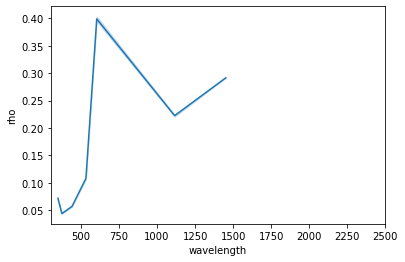

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.lineplot(x="wavelength", y="rho", data=df, ax=ax)
ax.set_xlim(300, 2500)
plt.show()

In [72]:
df

wavelength     rho
0       374.086570  0.0621
1       348.283617  0.0822
2       441.038063  0.0915
3       603.288011  0.2853
4      1115.184350  0.2891
5      1451.352683  0.2945
6       532.230769  0.2040
7       374.086570  0.0560
8       348.283617  0.0800
9       441.038063  0.0857
10      603.288011  0.3059
11     1115.184350  0.2738
12     1451.352683  0.2950
13      532.230769  0.1730
14      374.086570  0.0580
15      348.283617  0.0821
16      441.038063  0.0915
17      603.288011  0.3059
18     1115.184350  0.2815
19     1451.352683  0.2950
20      532.230769  0.1781
21      374.086570  0.0621
22      348.283617  0.0863
23      441.038063  0.0915
24      603.288011  0.3059
25     1115.184350  0.2865
26     1451.352683  0.2955
27      532.230769  0.1884
28      374.086570  0.0600
29      348.283617  0.0884
30      441.038063  0.0934
31      603.288011  0.3060
32     1115.184350  0.2866
33     1451.352683  0.2955
34      532.230769  0.1781
35      374.086570  0.0579
36      348.283617  0.0862
37      441.038063  0.0934
38      603.288011  0.3183
39     1115.184350  0.2841
40     1451.352683  0.2950
41      532.230769  0.1911
42      374.086570  0.0519
43      348.283617  0.0821
44      441.038063  0.0857
45      603.288011  0.3307
46     1115.184350  0.2815
47     1451.352683  0.2955
48      532.230769  0.1807
49      374.086570  0.0558
50      348.283617  0.0841
51      441.038063  0.0876
52      603.288011  0.3225
53     1115.184350  0.2916
54     1451.352683  0.2955
55      532.230769  0.1859
56      374.086570  0.0558
57      348.283617  0.0841
58      441.038063  0.0914
59      603.288011  0.3308
60     1115.184350  0.2967
61     1451.352683  0.2955
62      532.230769  0.1859
63      374.086570  0.0516
64      348.283617  0.0819
65      441.038063  0.0876
66      603.288011  0.3389
67     1115.184350  0.3094
68     1451.352683  0.2960
69      532.230769  0.1860
70      374.086570  0.0557
71      348.283617  0.0840
72      441.038063  0.0952
73      603.288011  0.3225
74     1115.184350  0.3094
75     1451.352683  0.2960
76      532.230769  0.1963
77      374.086570  0.0578
78      348.283617  0.0840
79      441.038063  0.0895
80      603.288011  0.3061
81     1115.184350  0.2917
82     1451.352683  0.2960
83      532.230769  0.1833
84      374.086570  0.0536
85      348.283617  0.0778
86      441.038063  0.0817
87      603.288011  0.2567
88     1115.184350  0.2361
89     1451.352683  0.2945
90      532.230769  0.1522
91      374.086570  0.0578
92      348.283617  0.0840
93      441.038063  0.0932
94      603.288011  0.3225
95     1115.184350  0.3018
96     1451.352683  0.2955
97      532.230769  0.1885
98      374.086570  0.0537
99      348.283617  0.0862
100     441.038063  0.0914
101     603.288011  0.3308
102    1115.184350  0.3094
103    1451.352683  0.2955
104     532.230769  0.1938
105     374.086570  0.0578
106     348.283617  0.0840
107     441.038063  0.0895
108     603.288011  0.3267
109    1115.184350  0.3068
110    1451.352683  0.2960
111     532.230769  0.1912
112     374.086570  0.0598
113     348.283617  0.0840
114     441.038063  0.0914
115     603.288011  0.3308
116    1115.184350  0.3068
117    1451.352683  0.2960
118     532.230769  0.1860
119     374.086570  0.0578
120     348.283617  0.0820
121     441.038063  0.0952
122     603.288011  0.3308
123    1115.184350  0.3144
124    1451.352683  0.2955
125     532.230769  0.1963
126     374.086570  0.0578
127     348.283617  0.0799
128     441.038063  0.0914
129     603.288011  0.3349
130    1115.184350  0.3120
131    1451.352683  0.2955
132     532.230769  0.1963
133     374.086570  0.0497
134     348.283617  0.0820
135     441.038063  0.0895
136     603.288011  0.3266
137    1115.184350  0.3094
138    1451.352683  0.2955
139     532.230769  0.1834
140     374.086570  0.0578
141     348.283617  0.0840
142     441.038063  0.0895
143     603.288011  0.3266
144    1115.184350  0.3094
145    1451.352683  0.2960
146     532.230769  0.1937
147     374.